Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

sns.set(style="whitegrid", palette="deep")

**LOAD DATA**

In [ ]:
df = pd.read_csv("/content/ecommerce_sales_customer_analytics.csv")
df["Order_Date"] = df["Order_Date"].apply(lambda x:x[0] if isinstance (x,(list, np.ndarray))else x)
df["Ship_Date"] = df["Ship_Date"].apply(lambda x:x[0] if isinstance(x,(list, np.ndarray))else x)

df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")
df["Ship_Date"] = pd.to_datetime(df["Ship_Date"], errors="coerce")

df.head()

,Order_ID,Order_Date,Ship_Days,Ship_Date,Customer_ID,Customer_Name,Customer_Age,Customer_Gender,Segment,Region,...,Quantity,Unit_Price,Discount,Total_Sales,Profit,Profit_Margin,Shipping_Cost,Order_Priority,Delivery_Status,Return_Reason
0,ORD-1000,2025-07-30,6,2025-08-05,CUST-6461,Amy Hess,47,Male,Consumer,South,...,1,73,0.422272,42.174167,7.968329,0.188939,12.497023,High,Pending,NaN
1,ORD-1001,2024-12-19,3,2024-12-22,CUST-1931,Eddie Gardner,40,Female,Home Office,North,...,8,65,0.272171,378.471094,34.761230,0.091846,6.415820,Medium,Delivered,NaN
2,ORD-1002,2024-12-27,4,2024-12-31,CUST-5344,Brandon Munoz,37,Female,Corporate,North,...,9,401,0.373874,2259.688280,318.811760,0.141087,2.961314,High,Delivered,NaN
3,ORD-1003,2024-11-29,3,2024-12-02,CUST-5657,Keith Adams,26,Female,Corporate,North,...,3,257,0.148180,656.753589,99.093511,0.150884,7.596489,Critical,Pending,NaN
4,ORD-1004,2025-05-29,3,2025-06-01,CUST-2748,Brandon Jackson,41,Male,Home Office,South,...,5,320,0.558052,707.116170,96.176805,0.136013,17.848883,Low,Cancelled,NaN


A. CLEANING & OUTLIER DETECTION (Z-SCORE)

In [ ]:
df["zscore_sales"] = (df["Total_Sales"]-df["Total_Sales"].mean())/df["Total_Sales"].std()
df[df["zscore_sales"].abs() > 3]

df["zscore_profit"] = (df["Profit"]-df["Profit"].mean())/df["Profit"].std()
df[df["zscore_profit"].abs() > 3]

,Order_ID,Order_Date,Ship_Days,Ship_Date,Customer_ID,Customer_Name,Customer_Age,Customer_Gender,Segment,Region,...,Discount,Total_Sales,Profit,Profit_Margin,Shipping_Cost,Order_Priority,Delivery_Status,Return_Reason,zscore_sales,zscore_profit
98,ORD-1098,2025-08-06,1,2025-08-07,CUST-5207,Brenda Flores,49,Male,Home Office,Central,...,0.016396,2960.648687,633.264585,0.213894,11.522002,Critical,Pending,NaN,2.319115,3.120630
129,ORD-1129,2025-08-26,7,2025-09-02,CUST-3658,Christina Villa,65,Female,Consumer,East,...,0.400463,2536.039921,633.402354,0.249760,5.390164,Low,Cancelled,NaN,1.821402,3.121522
225,ORD-1225,2025-01-19,2,2025-01-21,CUST-1628,Julie Richards,49,Female,Home Office,West,...,0.304624,3087.468619,658.091244,0.213149,10.305294,High,Cancelled,NaN,2.467769,3.281449
233,ORD-1233,2024-12-31,6,2025-01-06,CUST-9504,Luis Morrow,31,Female,Corporate,West,...,0.071019,3047.058174,695.606034,0.228288,6.719259,Critical,Returned,Late Delivery,2.420402,3.524457
274,ORD-1274,2025-05-23,4,2025-05-27,CUST-7536,Michelle Johnson,50,Male,Corporate,South,...,0.069325,3992.597517,960.841712,0.240656,10.324688,Critical,Cancelled,NaN,3.528734,5.242566
405,ORD-1405,2025-09-10,1,2025-09-11,CUST-7993,Timothy Hawkins,26,Female,Consumer,West,...,0.096762,3302.238605,664.401531,0.201197,12.813267,Low,Returned,Customer Changed Mind,2.719516,3.322325
412,ORD-1412,2025-02-20,4,2025-02-24,CUST-6945,Marvin Mcdonald,58,Male,Home Office,North,...,0.118714,3347.123015,706.532754,0.211087,7.520470,Medium,Cancelled,NaN,2.772128,3.595237
414,ORD-1414,2025-06-16,5,2025-06-21,CUST-3825,Elizabeth Lewis,38,Male,Home Office,South,...,0.044490,3688.268285,653.218986,0.177107,9.183899,High,Pending,NaN,3.172008,3.249888
485,ORD-1485,2025-07-31,2,2025-08-02,CUST-7064,Brenda Singh,27,Male,Corporate,Central,...,0.276026,2917.615619,682.695473,0.233991,14.279848,Medium,Cancelled,NaN,2.268673,3.440827
523,ORD-1523,2025-02-07,3,2025-02-10,CUST-8010,Kelsey Craig,40,Male,Home Office,West,...,0.097779,3414.005006,643.093377,0.188369,8.915940,Medium,Returned,Not Specified,2.850525,3.184298


1. GMV (Gross Merchandise Value)

In [ ]:
df["GMV"] = df["Unit_Price"]*df["Quantity"]

In [ ]:
df[["Unit_Price", "Quantity", "GMV"]].head()


,Unit_Price,Quantity,GMV
0,73,1,73
1,65,8,520
2,401,9,3609
3,257,3,771
4,320,5,1600


2. Effective Price

In [ ]:
df["Efective_Price"] = df["Unit_Price"]*(1-df["Discount"])
df[["Efective_Price", "Unit_Price", "Discount"]].head()

,Efective_Price,Unit_Price,Discount
0,42.174167,73,0.422272
1,47.308887,65,0.272171
2,251.076476,401,0.373874
3,218.917863,257,0.148180
4,141.423234,320,0.558052


3. Delivery Speed

In [ ]:
df["Delivery_Statuses"] = (df["Order_Date"]-df["Ship_Date"]).dt.days
df.head()

,Order_ID,Order_Date,Ship_Days,Ship_Date,Customer_ID,Customer_Name,Customer_Age,Customer_Gender,Segment,Region,...,Profit_Margin,Shipping_Cost,Order_Priority,Delivery_Status,Return_Reason,zscore_sales,zscore_profit,GMV,Efective_Price,Delivery_Statuses
0,ORD-1000,2025-07-30,6,2025-08-05,CUST-6461,Amy Hess,47,Male,Consumer,South,...,0.188939,12.497023,High,Pending,NaN,-1.101831,-0.929831,73,42.174167,-6
1,ORD-1001,2024-12-19,3,2024-12-22,CUST-1931,Eddie Gardner,40,Female,Home Office,North,...,0.091846,6.415820,Medium,Delivered,NaN,-0.707634,-0.756276,520,47.308887,-3
2,ORD-1002,2024-12-27,4,2024-12-31,CUST-5344,Brandon Munoz,37,Female,Corporate,North,...,0.141087,2.961314,High,Delivered,NaN,1.497471,1.083709,3609,251.076476,-4
3,ORD-1003,2024-11-29,3,2024-12-02,CUST-5657,Keith Adams,26,Female,Corporate,North,...,0.150884,7.596489,Critical,Pending,NaN,-0.381440,-0.339553,771,218.917863,-3
4,ORD-1004,2025-05-29,3,2025-06-01,CUST-2748,Brandon Jackson,41,Male,Home Office,South,...,0.136013,17.848883,Low,Cancelled,NaN,-0.322406,-0.358446,1600,141.423234,-3


C. MONTHLY SALES TREND

In [ ]:
monthly_sales = df.resample("M", on="Order_Date")["Total_Sales"].sum().reset_index()
monthly_sales.head()

/tmp/ipython-input-1126056461.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M", on="Order_Date")["Total_Sales"].sum().reset_index()


,Order_Date,Total_Sales
0,2024-11-30,27144.094651
1,2024-12-31,158927.648711
2,2025-01-31,194250.212018
3,2025-02-28,159502.194999
4,2025-03-31,157855.244041


D. GROWTH ANALYSIS (MoM)

In [ ]:
monthly_sales["Growth_MoM"] = monthly_sales["Total_Sales"].pct_change()
monthly_sales.head()

,Order_Date,Total_Sales,Growth_MoM
0,2024-11-30,27144.094651,NaN
1,2024-12-31,158927.648711,4.854962
2,2025-01-31,194250.212018,0.222256
3,2025-02-28,159502.194999,-0.178883
4,2025-03-31,157855.244041,-0.010326


E. RFM ANALYSIS

In [ ]:
snapshot = df["Order_Date"].max()+pd.Timedelta(days=1)

rfm = df.groupby("Customer_ID").agg({
    "Order_Date": lambda x: (snapshot - x.max()).days,
    "Order_ID":"count",
    "Total_Sales":"sum"
})

rfm.columns = ["Recency", "Frequency", "Moneary"]
rfm.head()

,Recency,Frequency,Moneary
Customer_ID,,,
CUST-1002,19,1,1021.153617
CUST-1010,360,1,52.289374
CUST-1015,119,2,1970.701908
CUST-1018,149,1,1665.743358
CUST-1029,297,1,170.830953


F. COHORT ANALYSIS

In [ ]:
df["Order_Month"] = df["Order_Date"].dt.to_period("M")
df["Cohort_Month"] = df.groupby("Customer_ID")["Order_Date"].transform("min").dt.to_period("M")

cohort = df.groupby(["Cohort_Month", "Order_Month"])["Customer_ID"].nunique().reset_index()
cohort["Period"] = (cohort["Order_Month"].astype(int)-cohort["Cohort_Month"].astype(int))

cohort_pivot = cohort.pivot_table(
    index='Cohort_Month',
    columns='Period',
    values='Customer_ID'
)


df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df['Cohort_Month'] = df.groupby('Customer_ID')['Order_Date'].transform('min').dt.to_period('M')

cohort = df.groupby(['Cohort_Month', 'Order_Month'])['Customer_ID'].nunique().reset_index()

cohort['Period'] = (cohort['Order_Month'] - cohort['Cohort_Month']).apply(lambda x: x.n)

cohort_pivot = cohort.pivot_table(index='Cohort_Month', columns='Period', values='Customer_ID')


G. CORRELATION MATRIX

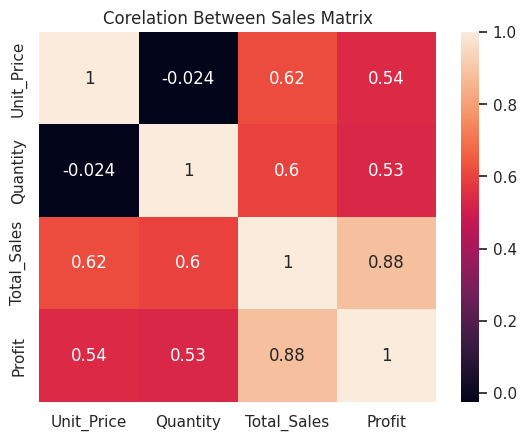

In [ ]:
corr = df[["Unit_Price", "Quantity", "Total_Sales", "Profit"]].corr()
sns.heatmap(corr,annot=True)
plt.title("Corelation Between Sales Matrix")
plt.show()

H. TOP PRODUCTS

In [ ]:
top_product = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False).head(10)
print(top_product)

Product
Binder            212137.619719
Office Chair      187781.272688
Bookshelf         174782.574737
Standing Desk     169212.782205
Desk Organizer    147428.547701
Pen Set           134401.341040
Filing Cabinet    123953.935623
Paper             117328.377884
Laptop            110670.677866
Computer          110640.536802
Name: Total_Sales, dtype: float64


I. DELIVERY PERFORMANCE

In [ ]:
delivery_perf = df.groupby("Delivery_Status")["Total_Sales"].count()
print(delivery_perf)

Delivery_Status
Cancelled    508
Delivered    506
Pending      498
Returned     488
Name: Total_Sales, dtype: int64


In [35]:
df.to_csv("/content/ecommerce_sales_customer_analytics.csv", index=False)
from google.colab import files
files.download("/content/ecommerce_sales_customer_analytics.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>